# UAV Mission Verification System

## 4D Space-Time Conflict Detection

This notebook demonstrates the UAV mission verification service with **4D conflict detection** (3D space + time).

### Key Features:
- ✅ **4D Conflict Detection**: Spatial + temporal analysis
- ✅ **10m Safety Buffer**: Configurable separation distance
- ✅ **Multiple Scenarios**: Safe, conflict, vertical separation, multiple conflicts
- ✅ **Comprehensive Visualizations**: Static + animated

## 1. Setup and Imports

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, Video, display
import json

from src import (
    FlightPlan, Waypoint,
    MissionVerificationService,
    ConflictDetector,
    FlightVisualizer,
    FlightDataGenerator
)

%matplotlib inline
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["figure.dpi"] = 100

print("✅ All imports successful!")
print("📍 Working directory:", os.getcwd())

✅ All imports successful!
📍 Working directory: /home/mmkr/flytbase


## 2. System Overview

### The Problem
You have a **primary mission** (your drone) and **simulated flight schedules** (other drones). Is your mission safe?

### The Solution
**Mission Verification Service** performs:
1. **Spatial Check**: Are paths within 10m?
2. **Temporal Check**: Are they close at the same time?
3. **4D Analysis**: Combined space-time conflict detection

## 3. Scenario 1: Safe Mission ✅

**Description**: Primary mission flies through airspace with good separation from simulated schedules.

In [2]:
print("="*70)
print("SCENARIO 1: SAFE MISSION (Well Separated)")
print("="*70)

# Generate simulated background traffic
generator = FlightDataGenerator(seed=42)

# Create 3 simulated flights in different regions
simulated_schedules_1 = []
for i in range(3):
    flight = generator.generate_flight(
        uav_id=f"SIM-{i+1}",
        pattern_type="patrol",
        priority=2
    )
    simulated_schedules_1.append(flight)

# Primary mission in a different area
primary_mission_1 = generator.generate_flight(
    uav_id="PRIMARY",
    pattern_type="point_to_point",
    priority=1
)

# Verify
service_1 = MissionVerificationService(simulated_schedules_1, safety_distance=10.0)
print("\n🔍 Verifying mission...\n")
result_1 = service_1.verify_mission(primary_mission_1, verbose=True)

print("\n" + "="*70)
if result_1.is_clear():
    print("✅ MISSION APPROVED: No conflicts!")
else:
    print(f"❌ MISSION REJECTED: {len(result_1.conflicts)} conflicts!")
print("="*70)

SCENARIO 1: SAFE MISSION (Well Separated)
📡 Verification Service Initialized
   Simulated Schedules: 3 flights
   Safety Distance: 10.0m
   Time Resolution: 0.5s

🔍 Verifying mission...


🔍 Verifying Mission: PRIMARY
   Waypoints: 16
   Duration: 277.9s
   Checking against 3 simulated flights...
   ✅ CLEAR - No conflicts detected

✅ MISSION APPROVED: No conflicts!


### Visualize Scenario 1


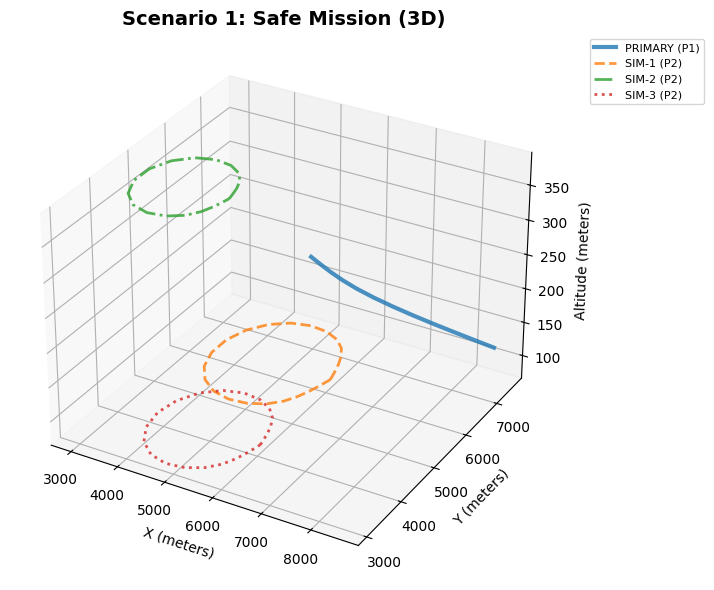

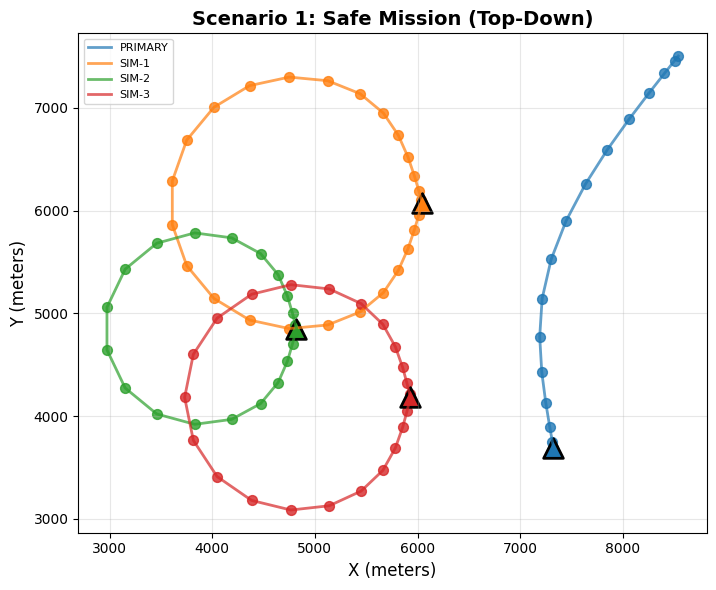

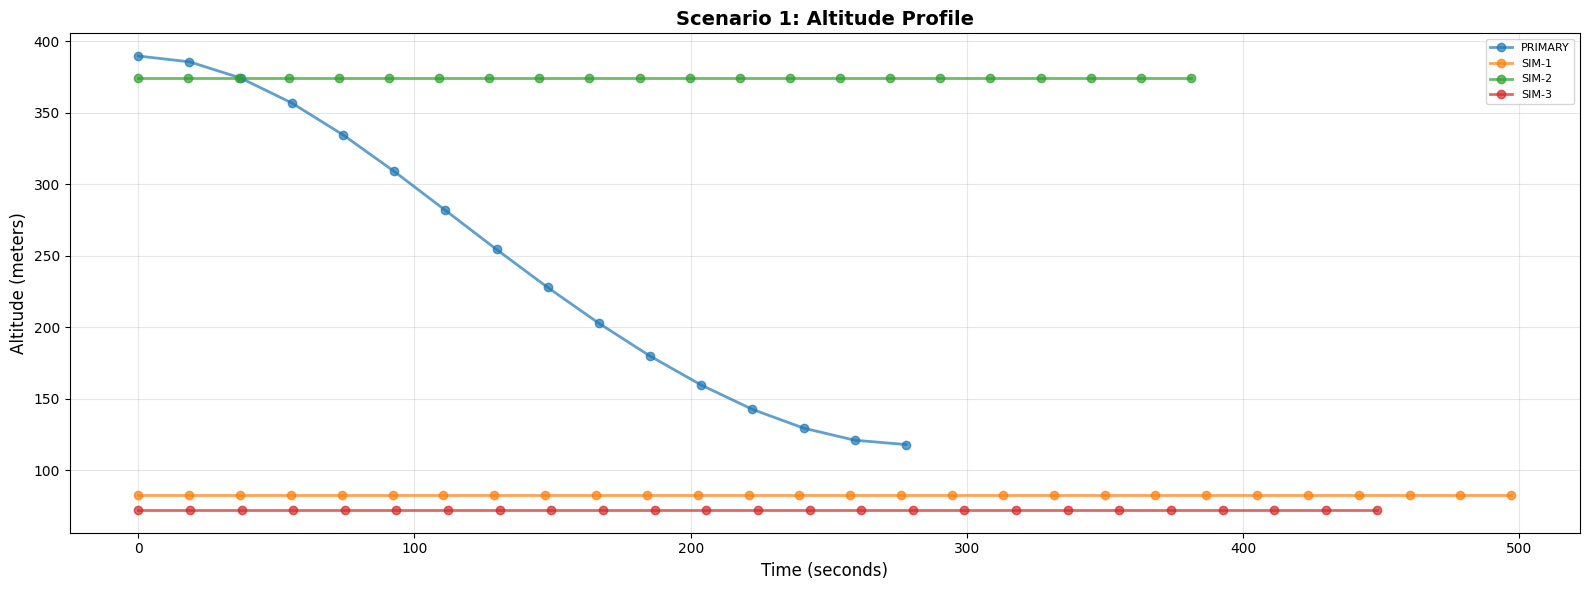

In [3]:
viz = FlightVisualizer(figsize=(16, 6))
all_flights_1 = [primary_mission_1] + simulated_schedules_1
conflicts_1 = result_1.conflicts if not result_1.is_clear() else None

fig = viz.plot_flights_3d(all_flights_1, conflicts=conflicts_1, title="Scenario 1: Safe Mission (3D)")
plt.tight_layout()
plt.show()

fig = viz.plot_flights_2d_top(all_flights_1, conflicts=conflicts_1, title="Scenario 1: Safe Mission (Top-Down)")
plt.tight_layout()
plt.show()

fig = viz.plot_altitude_profile(all_flights_1, conflicts=conflicts_1, title="Scenario 1: Altitude Profile")
plt.tight_layout()
plt.show()


## 4. Scenario 2: Conflict Detected ❌

**Description**: Primary mission conflicts with a simulated flight in both space and time.


In [4]:
print("\n" + "="*70)
print("SCENARIO 2: CONFLICT DETECTED (Space-Time Intersection)")
print("="*70)

# Create flights that will cross paths
generator = FlightDataGenerator(seed=123)

# Simulated flight: East to West, passing through center at t=100
waypoints_sim = [
    Waypoint(x=3000, y=5000, z=200, time=0.0),
    Waypoint(x=4900, y=5000, z=200, time=95.0),
    Waypoint(x=5000, y=5000, z=200, time=100.0),  # At center
    Waypoint(x=5100, y=5000, z=200, time=105.0),
    Waypoint(x=7000, y=5000, z=200, time=200.0),
]
sim_flight = FlightPlan(uav_id="SIM-CROSSING", waypoints=waypoints_sim, priority=2)

# Primary mission: North to South, also at center at t=100 (SAME TIME!)
waypoints_primary = [
    Waypoint(x=5000, y=3000, z=200, time=0.0),
    Waypoint(x=5000, y=4900, z=200, time=95.0),
    Waypoint(x=5000, y=5000, z=200, time=100.0),  # CONFLICT! Both at (5000,5000,200) at t=100
    Waypoint(x=5000, y=5100, z=200, time=105.0),
    Waypoint(x=5000, y=7000, z=200, time=200.0),
]
primary_mission_2 = FlightPlan(uav_id="PRIMARY", waypoints=waypoints_primary, priority=1)

# Add some background traffic
background = []
for i in range(2):
    flight = generator.generate_flight(
        uav_id=f"SIM-BG-{i+1}",
        pattern_type="waypoint_tour",
        priority=2
    )
    background.append(flight)

simulated_schedules_2 = [sim_flight] + background

# Verify
service_2 = MissionVerificationService(simulated_schedules_2, safety_distance=10.0)
print("\n🔍 Verifying mission...\n")
result_2 = service_2.verify_mission(primary_mission_2, verbose=True)

print("\n" + "="*70)
if result_2.is_clear():
    print("✅ MISSION APPROVED")
else:
    print(f"❌ MISSION REJECTED: {len(result_2.conflicts)} conflicts!")
    print("\nDetailed Report:")
    print(result_2.get_detailed_report())
print("="*70)



SCENARIO 2: CONFLICT DETECTED (Space-Time Intersection)
📡 Verification Service Initialized
   Simulated Schedules: 3 flights
   Safety Distance: 10.0m
   Time Resolution: 0.5s

🔍 Verifying mission...


🔍 Verifying Mission: PRIMARY
   Waypoints: 5
   Duration: 200.0s
   Checking against 3 simulated flights...
   ❌ CONFLICT - 1 conflict(s) detected

❌ MISSION REJECTED: 1 conflicts!

Detailed Report:
MISSION VERIFICATION REPORT: PRIMARY

❌ STATUS: CONFLICT DETECTED - MISSION NOT SAFE

Number of Conflicts: 1

CONFLICT DETAILS:
----------------------------------------------------------------------

Conflict #1:
  Location: (5000.0, 5000.0, 200.0)
  Time: 100.0s
  Conflicting Flight: SIM-CROSSING
  Minimum Distance: 0.0m
  Severity: 1.00



### Visualize Scenario 2

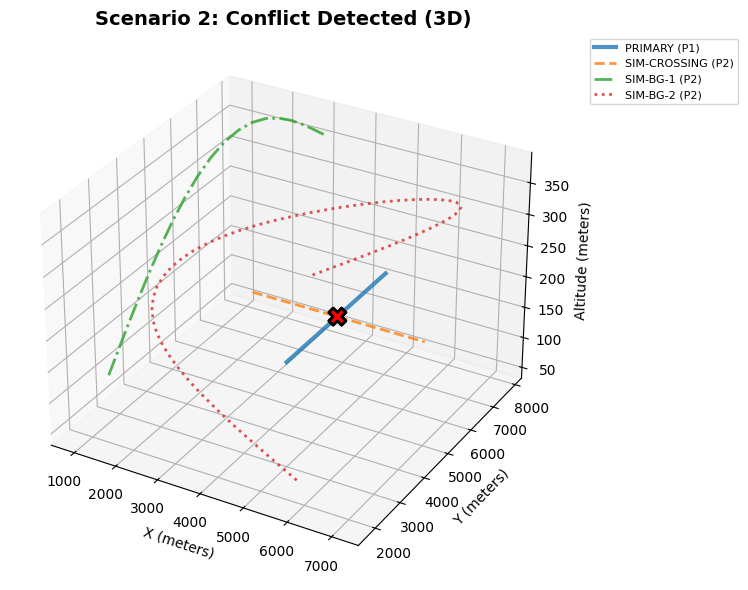

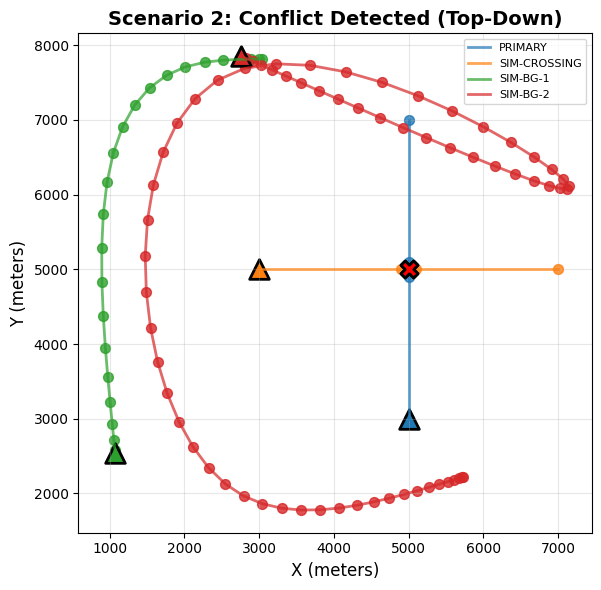

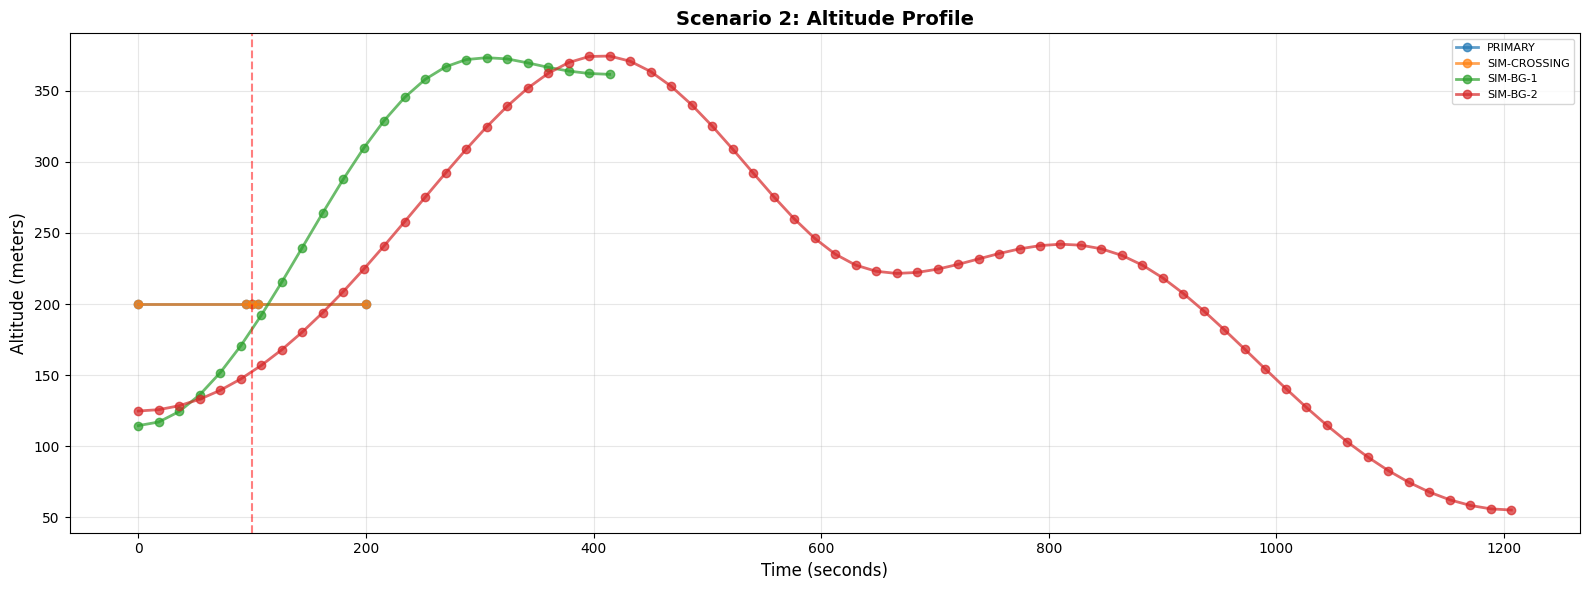

In [5]:
all_flights_2 = [primary_mission_2] + simulated_schedules_2
conflicts_2 = result_2.conflicts if not result_2.is_clear() else None

fig = viz.plot_flights_3d(all_flights_2, conflicts=conflicts_2, title="Scenario 2: Conflict Detected (3D)")
plt.tight_layout()
plt.show()

fig = viz.plot_flights_2d_top(all_flights_2, conflicts=conflicts_2, title="Scenario 2: Conflict Detected (Top-Down)")
plt.tight_layout()
plt.show()

fig = viz.plot_altitude_profile(all_flights_2, conflicts=conflicts_2, title="Scenario 2: Altitude Profile")
plt.tight_layout()
plt.show()

## 5. Scenario 3: Vertical Separation ✅

**Description**: Primary mission flies at different altitude - tests vertical separation (20m).

In [6]:
print("\n" + "="*70)
print("SCENARIO 3: VERTICAL SEPARATION (3D Spatial Analysis)")
print("="*70)

# Simulated flight at 200m altitude
waypoints_sim = [
    Waypoint(x=4000, y=4000, z=200, time=0.0),
    Waypoint(x=5000, y=5000, z=200, time=100.0),
    Waypoint(x=6000, y=6000, z=200, time=200.0),
]
sim_flight = FlightPlan(uav_id="SIM-LOW", waypoints=waypoints_sim, priority=2)

# Primary mission at 220m altitude (same X-Y path, only 20m vertical separation)
waypoints_primary = [
    Waypoint(x=4000, y=4000, z=220, time=0.0),
    Waypoint(x=5000, y=5000, z=220, time=100.0),
    Waypoint(x=6000, y=6000, z=220, time=200.0),
]
primary_mission_3 = FlightPlan(uav_id="PRIMARY", waypoints=waypoints_primary, priority=1)

# Add one more background flight
generator = FlightDataGenerator(seed=789)
background = generator.generate_flight(uav_id="SIM-BG", pattern_type="patrol", priority=2)

simulated_schedules_3 = [sim_flight, background]

# Verify
service_3 = MissionVerificationService(simulated_schedules_3, safety_distance=10.0)
print("\n🔍 Verifying mission...\n")
result_3 = service_3.verify_mission(primary_mission_3, verbose=True)

print("\n" + "="*70)
if result_3.is_clear():
    print("✅ MISSION APPROVED: Vertical separation sufficient!")
else:
    print(f"❌ MISSION REJECTED: {len(result_3.conflicts)} conflicts!")
print("="*70)


SCENARIO 3: VERTICAL SEPARATION (3D Spatial Analysis)
📡 Verification Service Initialized
   Simulated Schedules: 2 flights
   Safety Distance: 10.0m
   Time Resolution: 0.5s

🔍 Verifying mission...


🔍 Verifying Mission: PRIMARY
   Waypoints: 3
   Duration: 200.0s
   Checking against 2 simulated flights...
   ✅ CLEAR - No conflicts detected

✅ MISSION APPROVED: Vertical separation sufficient!


### Visualize Scenario 3


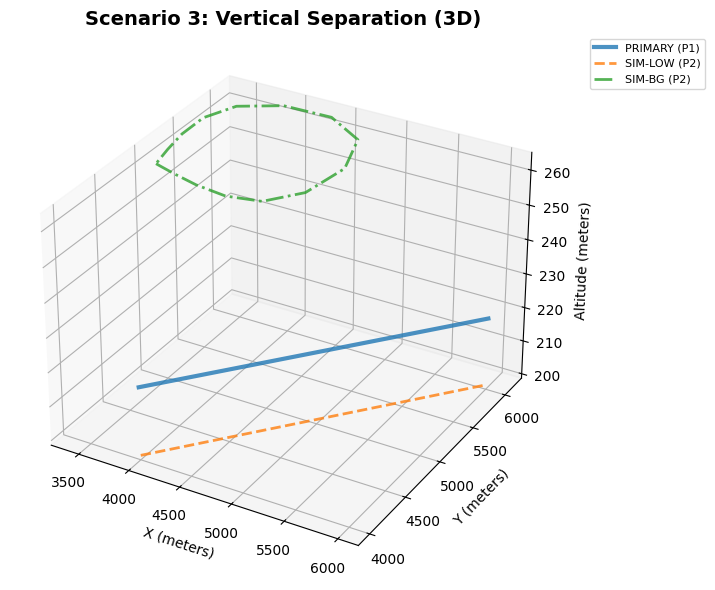

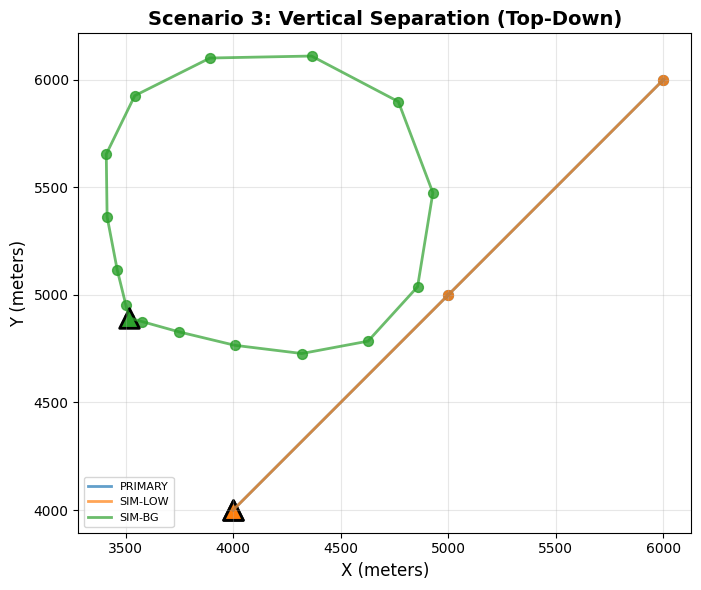

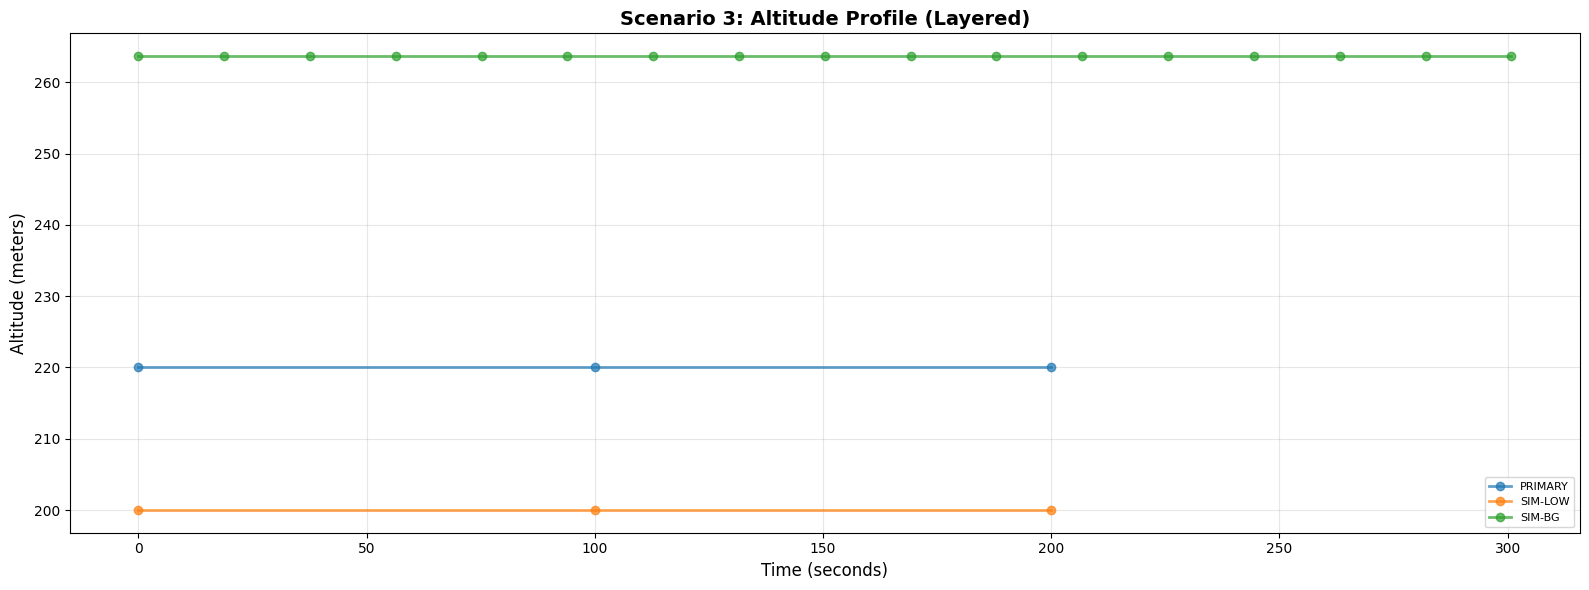

In [7]:
all_flights_3 = [primary_mission_3] + simulated_schedules_3
conflicts_3 = result_3.conflicts if not result_3.is_clear() else None

# 3D view is crucial for showing vertical separation
fig = viz.plot_flights_3d(all_flights_3, conflicts=conflicts_3, title="Scenario 3: Vertical Separation (3D)")
plt.tight_layout()
plt.show()

fig = viz.plot_flights_2d_top(all_flights_3, conflicts=conflicts_3, title="Scenario 3: Vertical Separation (Top-Down)")
plt.tight_layout()
plt.show()

# Altitude profile clearly shows the layered structure
fig = viz.plot_altitude_profile(all_flights_3, conflicts=conflicts_3, title="Scenario 3: Altitude Profile (Layered)")
plt.tight_layout()
plt.show()


## 6. Scenario 4: Multiple Conflicts ❌

**Description**: Primary mission conflicts with multiple drones at different times (sequential conflicts).


In [8]:
print("\n" + "="*70)
print("SCENARIO 4: MULTIPLE CONFLICTS (Sequential Conflicts)")
print("="*70)

# Primary mission: Long path that will cross 3 different drones
waypoints_primary = [
    Waypoint(x=2000, y=2000, z=200, time=0.0),
    Waypoint(x=3500, y=3500, z=200, time=75.0),
    Waypoint(x=4000, y=4000, z=200, time=100.0),  # Will conflict with SIM-1
    Waypoint(x=4500, y=4500, z=200, time=125.0),
    Waypoint(x=5500, y=5500, z=200, time=175.0),
    Waypoint(x=6000, y=6000, z=200, time=200.0),  # Will conflict with SIM-2
    Waypoint(x=6500, y=6500, z=200, time=225.0),
    Waypoint(x=7500, y=7500, z=200, time=275.0),
    Waypoint(x=8000, y=8000, z=200, time=300.0),  # Will conflict with SIM-3
]
primary_mission_4 = FlightPlan(uav_id="PRIMARY", waypoints=waypoints_primary, priority=1)

# Simulated flight 1: Passes through (4000, 4000) around same time
waypoints_sim1 = [
    Waypoint(x=4000, y=2000, z=200, time=50.0),
    Waypoint(x=4000, y=3500, z=200, time=87.5),
    Waypoint(x=4000, y=4000, z=200, time=100.0),  # CONFLICT 1! Same as primary at t=100
    Waypoint(x=4000, y=4500, z=200, time=112.5),
    Waypoint(x=4000, y=6000, z=200, time=150.0),
]
sim1 = FlightPlan(uav_id="SIM-CROSS-1", waypoints=waypoints_sim1, priority=2)

# Simulated flight 2: Passes through (6000, 6000) around same time
waypoints_sim2 = [
    Waypoint(x=8000, y=6000, z=200, time=150.0),
    Waypoint(x=7000, y=6000, z=200, time=175.0),
    Waypoint(x=6000, y=6000, z=200, time=200.0),  # CONFLICT 2! Same as primary at t=200
    Waypoint(x=5000, y=6000, z=200, time=225.0),
    Waypoint(x=4000, y=6000, z=200, time=250.0),
]
sim2 = FlightPlan(uav_id="SIM-CROSS-2", waypoints=waypoints_sim2, priority=2)

# Simulated flight 3: At (8000, 8000) around same time
waypoints_sim3 = [
    Waypoint(x=8000, y=7000, z=200, time=250.0),
    Waypoint(x=8000, y=7500, z=200, time=275.0),
    Waypoint(x=8000, y=8000, z=200, time=300.0),  # CONFLICT 3! Same as primary at t=300
    Waypoint(x=8000, y=8500, z=200, time=325.0),
    Waypoint(x=8000, y=9000, z=200, time=350.0),
]
sim3 = FlightPlan(uav_id="SIM-HOVER", waypoints=waypoints_sim3, priority=2)

simulated_schedules_4 = [sim1, sim2, sim3]

# Verify
service_4 = MissionVerificationService(simulated_schedules_4, safety_distance=10.0)
print("\n🔍 Verifying mission...\n")
result_4 = service_4.verify_mission(primary_mission_4, verbose=True)

print("\n" + "="*70)
if result_4.is_clear():
    print("✅ MISSION APPROVED")
else:
    print(f"❌ MISSION REJECTED: {len(result_4.conflicts)} conflicts!")
    unique_drones = len(set(c.uav2_id for c in result_4.conflicts))
    print(f"   Conflicts with {unique_drones} different drones")
    print("\nDetailed Report:")
    print(result_4.get_detailed_report())
print("="*70)



SCENARIO 4: MULTIPLE CONFLICTS (Sequential Conflicts)
📡 Verification Service Initialized
   Simulated Schedules: 3 flights
   Safety Distance: 10.0m
   Time Resolution: 0.5s

🔍 Verifying mission...


🔍 Verifying Mission: PRIMARY
   Waypoints: 9
   Duration: 300.0s
   Checking against 3 simulated flights...
   ❌ CONFLICT - 3 conflict(s) detected

❌ MISSION REJECTED: 3 conflicts!
   Conflicts with 3 different drones

Detailed Report:
MISSION VERIFICATION REPORT: PRIMARY

❌ STATUS: CONFLICT DETECTED - MISSION NOT SAFE

Number of Conflicts: 3

CONFLICT DETAILS:
----------------------------------------------------------------------

Conflict #1:
  Location: (4000.0, 4000.0, 200.0)
  Time: 100.0s
  Conflicting Flight: SIM-CROSS-1
  Minimum Distance: 0.0m
  Severity: 1.00

Conflict #2:
  Location: (6000.0, 6000.0, 200.0)
  Time: 200.0s
  Conflicting Flight: SIM-CROSS-2
  Minimum Distance: 0.0m
  Severity: 1.00

Conflict #3:
  Location: (8000.0, 8000.0, 200.0)
  Time: 300.0s
  Conflicting Fli

### Visualize Scenario 4


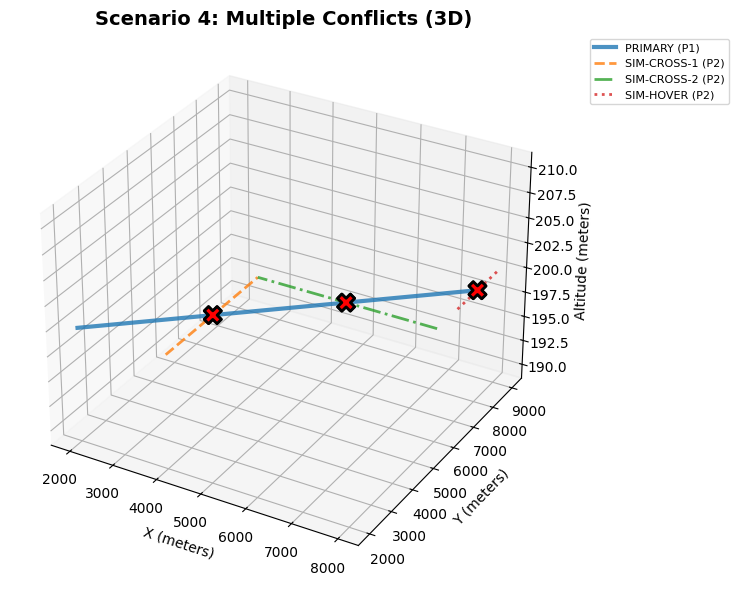

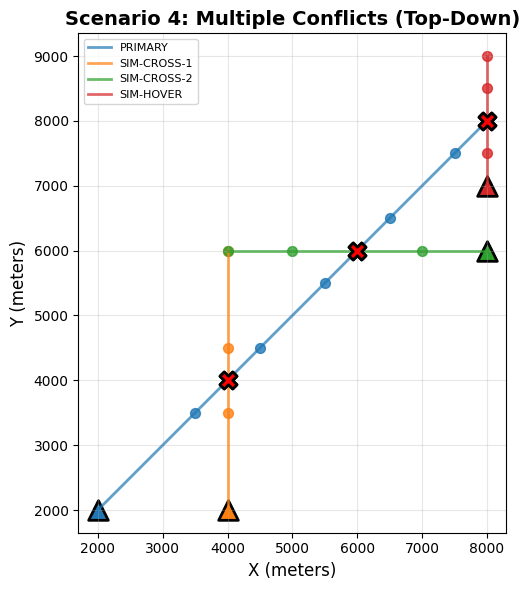

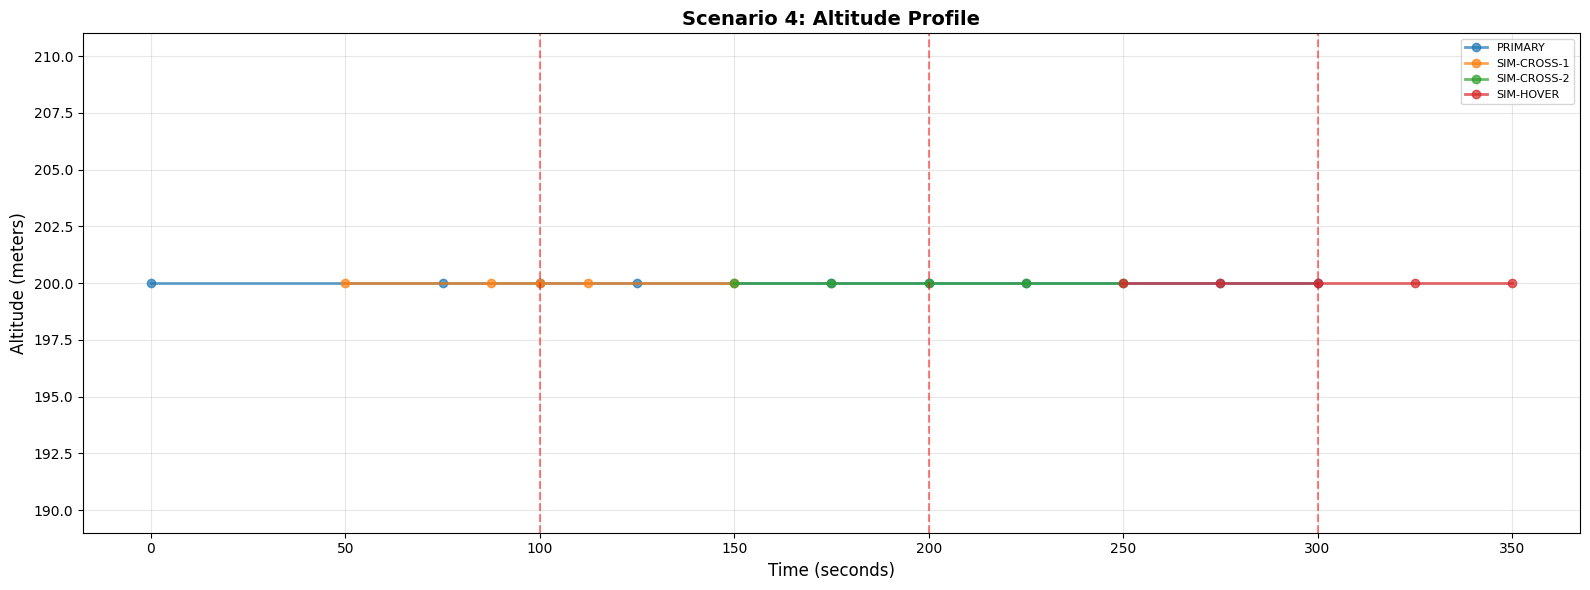

In [9]:
all_flights_4 = [primary_mission_4] + simulated_schedules_4
conflicts_4 = result_4.conflicts if not result_4.is_clear() else None

fig = viz.plot_flights_3d(all_flights_4, conflicts=conflicts_4, title="Scenario 4: Multiple Conflicts (3D)")
plt.tight_layout()
plt.show()

fig = viz.plot_flights_2d_top(all_flights_4, conflicts=conflicts_4, title="Scenario 4: Multiple Conflicts (Top-Down)")
plt.tight_layout()
plt.show()

fig = viz.plot_altitude_profile(all_flights_4, conflicts=conflicts_4, title="Scenario 4: Altitude Profile")
plt.tight_layout()
plt.show()


## 7. 4D Animation (3D Space + Time)

Create animated visualizations for Scenario 4 (busy airspace with multiple conflicts).


Creating 4D animations for Scenario 4 (Multiple Conflicts)...

1️⃣ 3D animation...
Saving animation to notebook_output/scenario4_3d.mp4...
✓ Saved successfully!
   ✅ Saved: notebook_output/scenario4_3d.mp4

2️⃣ 2D top-down animation...
Saving animation to notebook_output/scenario4_2d.mp4...
✓ Saved successfully!
   ✅ Saved: notebook_output/scenario4_2d.mp4

3️⃣ Altitude profile animation...
Saving animation to notebook_output/scenario4_altitude.mp4...
✓ Saved successfully!
   ✅ Saved: notebook_output/scenario4_altitude.mp4

✅ All animations created!


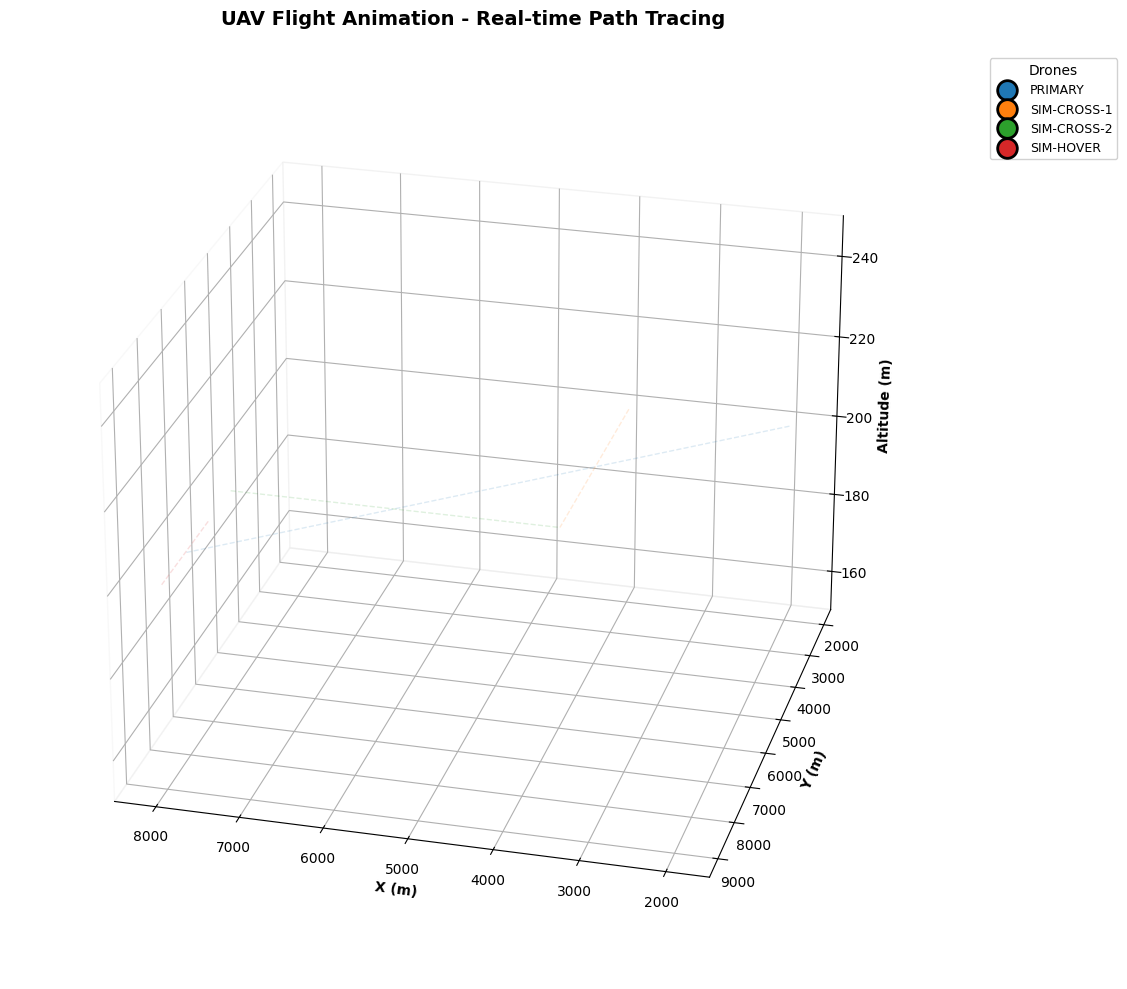

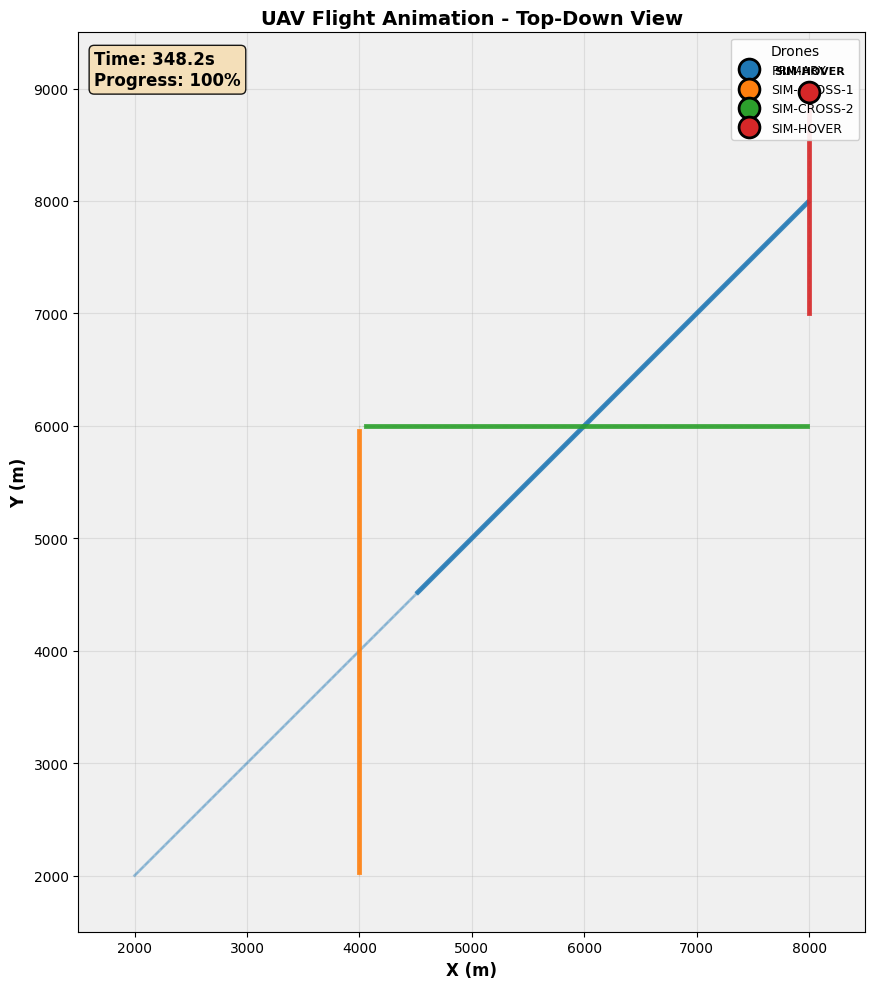

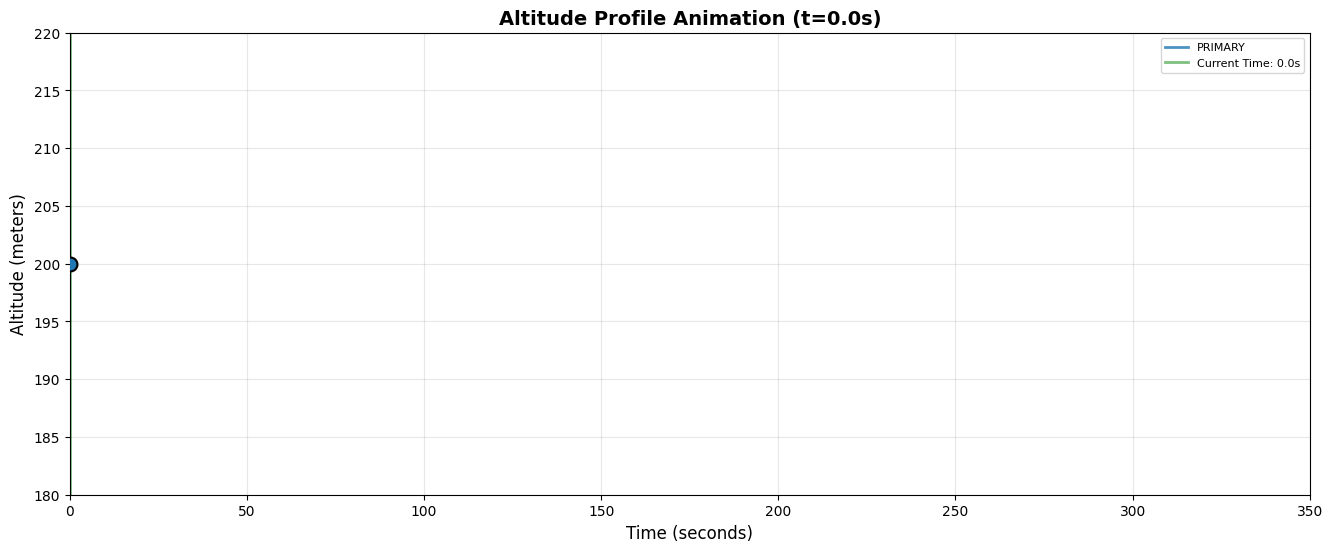

In [10]:
import os
os.makedirs('notebook_output', exist_ok=True)

print("Creating 4D animations for Scenario 4 (Multiple Conflicts)...\n")

print("1️⃣ 3D animation...")
anim_3d = viz.animate_3d(all_flights_4, conflicts=conflicts_4, duration=10, fps=20)
viz.save_animation(anim_3d, 'notebook_output/scenario4_3d.mp4')
print("   ✅ Saved: notebook_output/scenario4_3d.mp4")

print("\n2️⃣ 2D top-down animation...")
anim_2d = viz.animate_2d_topdown(all_flights_4, conflicts=conflicts_4, duration=10, fps=20)
viz.save_animation(anim_2d, 'notebook_output/scenario4_2d.mp4')
print("   ✅ Saved: notebook_output/scenario4_2d.mp4")

print("\n3️⃣ Altitude profile animation...")
anim_alt = viz.animate_altitude_profile(all_flights_4, conflicts=conflicts_4, duration=10, fps=20)
viz.save_animation(anim_alt, 'notebook_output/scenario4_altitude.mp4')
print("   ✅ Saved: notebook_output/scenario4_altitude.mp4")

print("\n✅ All animations created!")


### Display Animations


In [11]:
print("3D Animation (Multiple Conflicts):")
display(Video('notebook_output/scenario4_3d.mp4', width=800))


3D Animation (Multiple Conflicts):


In [12]:
print("2D Top-Down Animation:")
display(Video('notebook_output/scenario4_2d.mp4', width=800))


2D Top-Down Animation:


In [13]:
print("Altitude Profile Animation:")
display(Video('notebook_output/scenario4_altitude.mp4', width=800))


Altitude Profile Animation:


## 8. Summary

### Scenarios Recap:

1. ✅ **Scenario 1: Safe Mission** - All flights well separated
2. ❌ **Scenario 2: Conflict Detected** - Crossing paths at same time and location
3. ✅ **Scenario 3: Vertical Separation** - Same XY path but 20m vertical separation (safe)
4. ❌ **Scenario 4: Multiple Conflicts** - Sequential conflicts with 3 different drones

### Key Takeaways:

- **4D Detection**: The system analyzes both spatial proximity AND temporal overlap
- **Configurable Safety**: 10m safety buffer ensures adequate separation
- **Real-time Analysis**: Conflicts detected at sub-second granularity (0.5s time step)
- **Comprehensive Output**: Static plots + animated visualizations + JSON summaries

### Next Steps:

- Use your own flight data with the `MissionVerificationService`
- Adjust `safety_distance` based on your operational requirements
- Integrate with your mission planning system via JSON interface

**System is now ready for voiceover recording!** 🎬
